In [1]:
import os
import PIL
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

### Having the path in windows format

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

### Getting all the images

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

### Visualizing the images

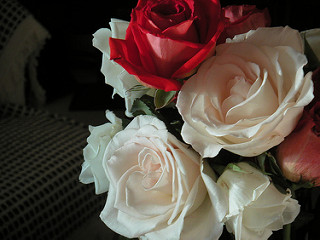

In [7]:
PIL.Image.open(str(roses[1]))

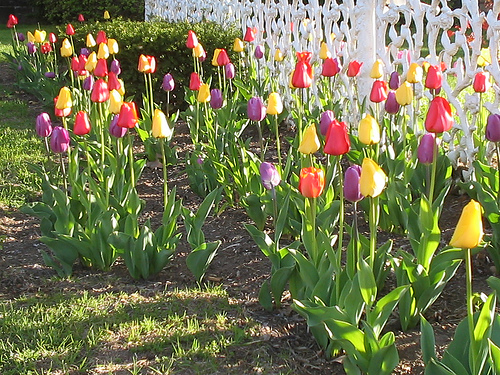

In [8]:
tulips =list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[324]))

### Dictionary of images

In [9]:
flower_image_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

### Dictionary of image labels

In [10]:
flower_label_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4
}

### Opening images and resizing them

In [11]:
s = str(flower_image_dict['roses'][0])
s

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [12]:
img = cv2.imread(s)
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [14]:
img.shape

(240, 179, 3)

In [15]:
x, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (180, 180))
        x.append(img)
        y.append(flower_label_dict[flower_name])

In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
y[630:640]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [19]:
len(x_train)

2752

In [20]:
len(x_test)

918

In [21]:
y_train.shape

(2752,)

In [22]:
type(y_train)

numpy.ndarray

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [28]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 55s 626ms/step - loss: 2.9428 - accuracy: 0.3765
Epoch 2/30
86/86 [==============================] - 75s 869ms/step - loss: 1.1361 - accuracy: 0.5320
Epoch 3/30
86/86 [==============================] - 73s 844ms/step - loss: 0.9865 - accuracy: 0.6090
Epoch 4/30
86/86 [==============================] - 57s 665ms/step - loss: 0.8771 - accuracy: 0.6624
Epoch 5/30
86/86 [==============================] - 53s 621ms/step - loss: 0.7519 - accuracy: 0.7158
Epoch 6/30
86/86 [==============================] - 52s 599ms/step - loss: 0.5932 - accuracy: 0.7783
Epoch 7/30
86/86 [==============================] - 52s 603ms/step - loss: 0.4661 - accuracy: 0.8292
Epoch 8/30
86/86 [==============================] - 53s 613ms/step - loss: 0.3054 - accuracy: 0.8943
Epoch 9/30
86/86 [==============================] - 52s 605ms/step - loss: 0.2124 - accuracy: 0.9317
Epoch 10/30
86/86 [==============================] - 57s 661ms/step - loss: 0.1107 - accura

In [29]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 6s 172ms/step - loss: 2.8951 - accuracy: 0.6220


[2.895059108734131, 0.6220043301582336]

*Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (62.20%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting*

In [30]:
predictions = model.predict(x_test)
predictions

array([[  0.92799634,  15.320044  ,  -5.3316913 , -14.100853  ,
         -5.835193  ],
       [  1.9970375 ,  -1.5137022 ,  12.020212  , -29.218252  ,
          6.983638  ],
       [ -1.8634123 , -10.0087185 ,   7.9061785 , -15.847944  ,
         10.505245  ],
       ...,
       [-10.282016  , -11.909935  ,   3.5558307 ,   8.666766  ,
         -1.9739941 ],
       [  7.391701  ,  -4.719698  ,  -0.9886123 , -12.873831  ,
         -0.08828396],
       [-12.373584  ,  -1.3783796 ,   0.99546385,   5.161581  ,
          1.2217755 ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.6184069e-07, 9.9999940e-01, 1.0741503e-09, 1.6698086e-13,
       6.4922756e-10], dtype=float32)>

In [32]:
np.argmax(score)

1

In [33]:
y_test[0]

1

In [68]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
])

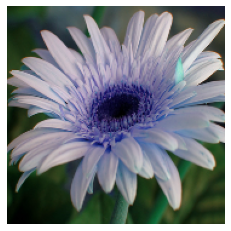

In [64]:
plt.axis('off')
plt.imshow(x[6])

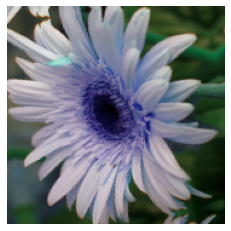

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(x)[6].numpy().astype("uint8"))

### Data Augmentation Layer

In [71]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [72]:
model = tf.keras.Sequential([
    data_augmentation,
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 69s 781ms/step - loss: 1.2936 - accuracy: 0.4462
Epoch 2/30
86/86 [==============================] - 72s 839ms/step - loss: 1.0357 - accuracy: 0.5985
Epoch 3/30
86/86 [==============================] - 64s 740ms/step - loss: 0.9305 - accuracy: 0.6384
Epoch 4/30
86/86 [==============================] - 62s 724ms/step - loss: 0.8733 - accuracy: 0.6657
Epoch 5/30
86/86 [==============================] - 64s 741ms/step - loss: 0.8060 - accuracy: 0.6904
Epoch 6/30
86/86 [==============================] - 73s 845ms/step - loss: 0.7519 - accuracy: 0.7151
Epoch 7/30
86/86 [==============================] - 71s 821ms/step - loss: 0.7373 - accuracy: 0.7126
Epoch 8/30
86/86 [==============================] - 68s 788ms/step - loss: 0.6761 - accuracy: 0.7456
Epoch 9/30
86/86 [==============================] - 67s 782ms/step - loss: 0.6562 - accuracy: 0.7504
Epoch 10/30
86/86 [==============================] - 72s 839ms/step - loss: 0.6323 - accura

In [74]:
model.evaluate(x_test, y_test)

29/29 [==============================] - 11s 365ms/step - loss: 1.2544 - accuracy: 0.6895


[1.2544265985488892, 0.6895424723625183]

**We can see that by using data augmentation and drop out layer the accuracy increased from 62.20 to 68.95.**
**Accuracy increased by 6.75%**